In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

from keras.datasets import mnist, cifar10

import pandas as pd
from matplotlib import pyplot as plt

from IPython.display import clear_output
%matplotlib inline

Using TensorFlow backend.


In [146]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

AttributeError: module 'keras.datasets.cifar' has no attribute 'load_data'

In [7]:
print(len(y_train))
print(len(y_test))

60000
10000


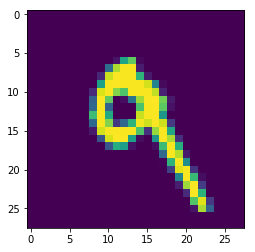

Continue...l


KeyboardInterrupt: 

In [31]:
for i in range(10):
    plt.imshow(x_test[i]);
    plt.show()
    input('Continue...')
    clear_output()

In [107]:
(_, y_train_d), (_, y_test_d) = mnist.load_data()

In [53]:
x_test.shape

(10000, 784)

In [51]:
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

In [57]:
n_classes = 10 #количество классов

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [134]:
#Построение нейросетевой модели
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu')) #скрытый слой
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [128]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_42 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [3]:
seed = 42
import random
random.seed(seed)
np.random.seed(seed)

from tensorflow import set_random_seed
set_random_seed(seed)

In [135]:
%%time
model.fit(x_train, y_train,o
          epochs=50,
          batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 44us/step - loss: 6.7338 - acc: 0.5766 - val_loss: 5.7015 - val_acc: 0.6423
Epoch 2/50
48000/48000 [==============================] - 2s 33us/step - loss: 4.7093 - acc: 0.7037 - val_loss: 4.3248 - val_acc: 0.7274
Epoch 3/50
48000/48000 [==============================] - 2s 34us/step - loss: 4.1962 - acc: 0.7367 - val_loss: 4.1540 - val_acc: 0.7388
Epoch 4/50
48000/48000 [==============================] - 2s 33us/step - loss: 4.0635 - acc: 0.7448 - val_loss: 3.9962 - val_acc: 0.7493
Epoch 5/50
48000/48000 [==============================] - 2s 33us/step - loss: 3.9648 - acc: 0.7512 - val_loss: 3.9669 - val_acc: 0.7519
Epoch 6/50
48000/48000 [==============================] - 2s 33us/step - loss: 3.8070 - acc: 0.7611 - val_loss: 2.8048 - val_acc: 0.8212
Epoch 7/50
48000/48000 [==============================] - 2s 32us/step - loss: 2.7395 - acc: 0.8266 - val_loss: 2.5400 - val_acc

KeyboardInterrupt: 

In [136]:
#Построение нейросетевой модели
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='sigmoid')) #скрытый слой
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [140]:
x_train_sig = (x_train - x_train.mean()) / x_train.std()

In [142]:
x_train_sig.max()

2.821543345689335

In [143]:
%%time
model.fit(x_train_sig, y_train,
          epochs=50,
          batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.1165 - acc: 0.9648 - val_loss: 0.1218 - val_acc: 0.9636
Epoch 2/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.0902 - acc: 0.9727 - val_loss: 0.1139 - val_acc: 0.9673
Epoch 3/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.0816 - acc: 0.9755 - val_loss: 0.1122 - val_acc: 0.9667
Epoch 4/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.0729 - acc: 0.9783 - val_loss: 0.1151 - val_acc: 0.9666
Epoch 5/50
48000/48000 [==============================] - 1s 28us/step - loss: 0.0662 - acc: 0.9803 - val_loss: 0.1049 - val_acc: 0.9696
Epoch 6/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.0595 - acc: 0.9829 - val_loss: 0.1030 - val_acc: 0.9691
Epoch 7/50
48000/48000 [==============================] - 1s 30us/step - loss: 0.0527 - acc: 0.9851 - val_loss: 0.1004 - val_acc

CIFAR PART AND CONV NETS

In [53]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

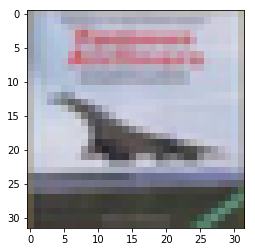

Continue...д


KeyboardInterrupt: 

In [54]:
for i in range(10):
    plt.imshow(x_test[i]);
    plt.show()
    input('Continue...')
    clear_output()

In [91]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array

In [90]:
train_datagen = ImageDataGenerator(
      rotation_range=60,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [97]:
img = np.expand_dims(img, axis=0)

In [98]:
out = train_datagen.flow(img, batch_size=32)

In [99]:
imgs = out.next()

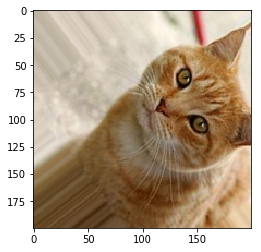

Continue...д


KeyboardInterrupt: 

In [104]:
while True:
    img = out.next()[0]
    plt.imshow(np.asarray(img, dtype=int));
    plt.show()
    input('Continue...')
    clear_output()

In [5]:
# x_train = np.reshape(x_train, (len(x_train), 32*32*3))
# x_test = np.reshape(x_test, (len(x_test), 32*32*3))

n_classes = 10 #количество классов

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [163]:
x_train_sig = (x_train - x_train.mean()) / x_train.std()

In [18]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [105]:
from keras import regularizers

In [21]:
#Построение нейросетевой модели
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='linear', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='elu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', )) 
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 32)          0         
__________

In [15]:
%%time
model.fit(x_train, y_train,
          epochs=10,
          batch_size=256, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
39936/40000 [============================>.] - ETA: 0s - loss: 14.4981 - acc: 0.1005

KeyboardInterrupt: 

In [ ]:
# Save the model
model.save(MY_PATH + 'path_to_my_model.h5')

# Recreate the exact same model purely from the file
new_model = keras.models.load_model('path_to_my_model.h5')

In [23]:
# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

In [24]:
model.save_weights('my_model_weights_15.h5')

'{"class_name": "Sequential", "config": {"name": "sequential_6", "layers": [{"class_name": "Conv2D", "config": {"name": "conv2d_10", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_2", "trainable": true, "axis": -1, "momentum": 0.99, "epsilon": 0.001, "center": true, "scale": true, "beta_initializer": {"class_name": "Zeros", "config": {}}, "gamma_initializer": {"class_name"

In [ ]:
model.load_weights()

In [ ]:
model.fit()

In [47]:
from keras.applications import VGG16

image_size = 224

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))



In [32]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [48]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-2]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000002A25DACA288> False
<keras.layers.convolutional.Conv2D object at 0x000002A25DACA2C8> False
<keras.layers.convolutional.Conv2D object at 0x000002A25DAEF248> False
<keras.layers.pooling.MaxPooling2D object at 0x000002A25C4B2708> False
<keras.layers.convolutional.Conv2D object at 0x000002A25C4B22C8> False
<keras.layers.convolutional.Conv2D object at 0x000002A218838B48> False
<keras.layers.pooling.MaxPooling2D object at 0x000002A218857C48> False
<keras.layers.convolutional.Conv2D object at 0x000002A218857F08> False
<keras.layers.convolutional.Conv2D object at 0x000002A2188828C8> False
<keras.layers.convolutional.Conv2D object at 0x000002A2188BC608> False
<keras.layers.pooling.MaxPooling2D object at 0x000002A2188CAD48> False
<keras.layers.convolutional.Conv2D object at 0x000002A2188CAD88> False
<keras.layers.convolutional.Conv2D object at 0x000002A2189096C8> False
<keras.layers.convolutional.Conv2D object at 0x000002A218935348> False
<ker

In [49]:
model = Sequential()

model.add(vgg_conv)
model.add(Flatten())

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_17 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 17,930,538
Trainable params: 5,575,658
Non-trainable params: 12,354,880
_________________________________________________________________


In [51]:
model.add(Dense(128, activation='relu', )) 
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])